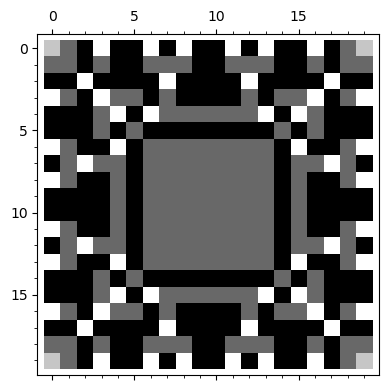

In [9]:
# MIP for computing recurrent configurations
def MIP(g,sink,conf):
    p = MixedIntegerLinearProgram(maximization=True,solver='GLPK')
    b = p.new_variable(integer=True)
    m = g.laplacian_matrix().delete_columns([sink]).delete_rows([sink])
    sigma = [v - 1 - c for (v,c) in zip(g.degree(),conf)]
    del sigma[sink]
    lhs = [-c for c in conf]
    del lhs[sink]
    p.set_objective(sum([b[i] for i in range(len(sigma)) ]))
    p.add_constraint(m*b, min=lhs, max=sigma)
    p.solve()
    sol = vector(p.get_values(b).values())
    return [int(u-v) for (u,v) in zip(m*sol,lhs)]

def identity_grid(n):
    G = graphs.Grid2dGraph(n,n)
    G = G.relabel(lambda i: n*i[0]+i[1], inplace=False)
    G.add_vertex(n*n)
    for i in range(n):
        G.add_edge(n*n,i)
        G.add_edge(n*n,n*i)
        G.add_edge(n*n,n*(n-1)+i)
        G.add_edge(n*n,n*i+n-1)
    sink = n*n
    configuration = G.order()*[0] # zero vector, to compute the identity
    return matrix(n,MIP(G,sink,configuration))

matrix_plot(identity_grid(20))